In [1]:
import pyodbc
import pandas as pd

host="pgeuwpeoairds01.csocaxkptatf.us-west-1.rds.amazonaws.com"
port=1433
dbname="pg_e_customer_analyze"
user="pgedbmaster"
password="d3cw7b6vEEZI"

conn = pyodbc.connect(DRIVER='SQL Server',
                      PORT =1433, 
    SERVER=host,
    DATABASE=dbname,
    UID=user,
    PWD=password
    )

In [2]:
FinalData = pd.read_sql('''
select ACCT_ID, ACCT_TENURE, Service_Total,
    CCA_COUNT, DESCR_1,Avg_Bill_AMT, 
    Bill_Count, Total_Payment_Count, Avg_Payment,
    Equal_Payment_Plan_Flag,
    PP_COUNT,  
    AutoPayFlag, 
    Web_Enrollment_Flag,
       Mobile_Login_Counts, CSO_VISIT, IVR_COUNT, 
       UCID_COUNT_2016, UCID_COUNT_2017
From Final_CAR_Cluster_part2
''', conn)

In [14]:
print (FinalData.shape)
FinalData.head(2)
# print (FinalData.describeribe())

(3972965, 18)


,ACCT_ID,ACCT_TENURE,Service_Total,CCA_COUNT,DESCR_1,Avg_Bill_AMT,Bill_Count,Total_Payment_Count,Avg_Payment,Equal_Payment_Plan_Flag,PP_COUNT,AutoPayFlag,Web_Enrollment_Flag,Mobile_Login_Counts,CSO_VISIT,IVR_COUNT,UCID_COUNT_2016,UCID_COUNT_2017
0,4.958876e+09,3.471198,2.0,0,Residential Detached House,109.681905,21.0,16.0,126.023125,0,1.0,0,1,0,1.0,1.0,0.0,0.0
1,4.958896e+09,11.000000,1.0,0,Residential Detached House,24.060952,21.0,22.0,23.570455,0,0.0,0,1,0,NaN,NaN,0.0,0.0


In [3]:
FinalData['ACD_CALL_COUNT'] = FinalData["UCID_COUNT_2016"]+ FinalData["UCID_COUNT_2017"]
FinalData_2 = FinalData.drop(["UCID_COUNT_2016", "UCID_COUNT_2017"], axis = 1)

In [4]:
FinalData_2.fillna(0, inplace = True)

In [23]:
FinalData_2.groupby("DESCR_1").ACCT_ID.nunique()

DESCR_1
                                  133572
Agricultural Pump                     23
Agricultural other than pump         119
Apartment                         118145
CIA Use in Common                    134
Commercial Pump                        5
Commercial or Industrial            1364
Communications Equipment Site          2
Created in Error/Duplicate            15
Demolished Premise                    52
Domestic Well/Pump                  1778
Electric Gate                         23
Live/Work Dual Use Facility          337
Mailing Address                       11
Mobile Home                         3873
Mobile Home Park                     860
Other Fixed Usage                     10
Park                                   5
Parking Lot Lights                    35
Residential Detached House       3630059
Residential Multi-Family           78151
Residential Use in Common           3020
Secondary Dwelling Unit             1179
Sign or Billboard                      3
Streetli

In [5]:
Final_Data_Clustering = FinalData_2.drop("DESCR_1", axis = 1)

In [6]:
Final_Data_Clustering_X = Final_Data_Clustering
Final_Data_Clustering_label = Final_Data_Clustering.iloc[:, 0]

# X_Train  X_test

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final_Data_Clustering_X, Final_Data_Clustering_label,
                                                    test_size=0.5, random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train.head(5)

,ACCT_ID,ACCT_TENURE,Service_Total,CCA_COUNT,Avg_Bill_AMT,Bill_Count,Total_Payment_Count,Avg_Payment,Equal_Payment_Plan_Flag,PP_COUNT,AutoPayFlag,Web_Enrollment_Flag,Mobile_Login_Counts,CSO_VISIT,IVR_COUNT,ACD_CALL_COUNT
1737995,5.373262e+09,3.000000,3.0,0,110.792857,21.0,22.0,101.616818,0,0.0,0,0,0,0.0,0.0,0.0
2175549,6.484961e+09,3.471198,1.0,0,40.136667,21.0,9.0,81.952222,0,3.0,0,0,0,0.0,4.0,1.0
476289,8.172788e+09,3.471198,4.0,0,15.351429,21.0,71.0,33.289296,0,0.0,0,0,0,0.0,0.0,0.0
1399690,7.076234e+09,0.000000,1.0,0,6.748095,21.0,2.0,100.000000,0,0.0,0,0,0,0.0,0.0,0.0
2986302,2.622453e+09,3.471198,1.0,0,65.462381,21.0,22.0,61.638182,0,0.0,0,0,0,0.0,0.0,0.0


In [214]:
X_train.describe()

,ACCT_ID,ACCT_TENURE,Service_Total,CCA_COUNT,Avg_Bill_AMT,Bill_Count,Total_Payment_Count,Avg_Payment,Equal_Payment_Plan_Flag,PP_COUNT,AutoPayFlag,Web_Enrollment_Flag,Mobile_Login_Counts,CSO_VISIT,IVR_COUNT,ACD_CALL_COUNT
count,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06
mean,4.995831e+09,3.470597e+00,2.087961e+00,1.715530e-01,1.353105e+02,1.970548e+01,1.794137e+01,1.553373e+02,4.767121e-02,3.992571e-01,8.034858e-02,4.975318e-01,1.945757e+00,9.964993e-01,2.091779e+00,7.337998e-01
std,2.889866e+09,1.751427e+00,1.859987e+00,5.607292e-01,4.988966e+02,4.319473e+00,6.353125e+00,9.876525e+02,2.130697e-01,1.414784e+00,2.718322e-01,4.999940e-01,1.363432e+01,3.664546e+00,6.394008e+00,2.038388e+00
min,1.968000e+03,-1.000000e+01,1.000000e+00,0.000000e+00,-1.701480e+03,1.000000e+00,1.000000e+00,-4.537800e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.489373e+09,3.471198e+00,1.000000e+00,0.000000e+00,5.593060e+01,2.100000e+01,1.600000e+01,6.503182e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.994782e+09,3.471198e+00,2.000000e+00,0.000000e+00,1.092095e+02,2.100000e+01,1.900000e+01,1.218559e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.499100e+09,3.471198e+00,3.000000e+00,0.000000e+00,1.536014e+02,2.100000e+01,2.100000e+01,1.658479e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,1.000000e+10,1.300000e+01,1.026000e+03,3.810000e+02,1.871170e+05,4.000000e+01,1.279000e+03,7.171710e+05,1.000000e+00,2.400000e+01,1.000000e+00,1.000000e+00,1.764200e+04,1.770000e+02,1.210000e+03,2.590000e+02


In [9]:
countiousVar = ["ACCT_TENURE", "Avg_Bill_AMT", "Avg_Payment"]
discreateVar = ["Service_Total", "CCA_COUNT", "Bill_Count", "Total_Payment_Count"]

acctBasicVar = ["ACCT_TENURE"]
productVar = ["Service_Total", "CCA_COUNT"]
amountVar = ["Avg_Bill_AMT", "Avg_Payment"]
frequentVar = ["Bill_Count", "Total_Payment_Count"]
channelVar = ["Mobile_Login_Counts", "CSO_VISIT", "IVR_COUNT", "ACD_CALL_COUNT"]
serviceVar = ["Equal_Payment_Plan_Flag", "AutoPayFlag", "Web_Enrollment_Flag", "PP_COUNT"]

# Outlier Treatment

In [10]:
import numpy as np

X_train[countiousVar+discreateVar] = X_train[countiousVar+discreateVar].apply(lambda x: x.clip_upper(np.percentile(x, 99))).apply(lambda x: x.clip_lower(np.percentile(x, 1)))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [140]:
X_train.describe()

,ACCT_ID,ACCT_TENURE,Service_Total,CCA_COUNT,Avg_Bill_AMT,Bill_Count,Total_Payment_Count,Avg_Payment,Equal_Payment_Plan_Flag,PP_COUNT,AutoPayFlag,Web_Enrollment_Flag,Mobile_Login_Counts,CSO_VISIT,IVR_COUNT,ACD_CALL_COUNT
count,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06,1.986482e+06
mean,4.995831e+09,3.464707e+00,2.055397e+00,1.641570e-01,1.256873e+02,1.970313e+01,1.786382e+01,1.410348e+02,4.767121e-02,3.992571e-01,8.034858e-02,4.975318e-01,1.945757e+00,9.964993e-01,2.091779e+00,7.337998e-01
std,2.889866e+09,1.725813e+00,9.267822e-01,3.704181e-01,9.949582e+01,4.284249e+00,5.759158e+00,1.139836e+02,2.130697e-01,1.414784e+00,2.718322e-01,4.999940e-01,1.363432e+01,3.664546e+00,6.394008e+00,2.038388e+00
min,1.968000e+03,0.000000e+00,1.000000e+00,0.000000e+00,9.496100e+00,2.000000e+00,1.000000e+00,1.066620e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.489373e+09,3.471198e+00,1.000000e+00,0.000000e+00,5.593060e+01,2.100000e+01,1.600000e+01,6.503182e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.994782e+09,3.471198e+00,2.000000e+00,0.000000e+00,1.092095e+02,2.100000e+01,1.900000e+01,1.218559e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.499100e+09,3.471198e+00,3.000000e+00,0.000000e+00,1.536014e+02,2.100000e+01,2.100000e+01,1.658479e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
max,1.000000e+10,1.000000e+01,5.000000e+00,1.000000e+00,5.948044e+02,2.200000e+01,3.500000e+01,7.232124e+02,1.000000e+00,2.400000e+01,1.000000e+00,1.000000e+00,1.764200e+04,1.770000e+02,1.210000e+03,2.590000e+02


In [11]:
Outliner_X = X_train[["ACCT_ID", "ACCT_TENURE"]]
Outliner_X["productVar_combined"] = X_train[productVar].sum(axis =1).apply(lambda x: x/len(productVar))
Outliner_X["amountVar_combined"] = X_train[amountVar].sum(axis =1).apply(lambda x: x/len(amountVar))
Outliner_X["frequentVar_combined"] = X_train[frequentVar].sum(axis =1).apply(lambda x: x/len(frequentVar))
Outliner_X["channelVar_combined"] = X_train[channelVar].sum(axis =1).apply(lambda x: x/len(channelVar))
Outliner_X["serviceVar_combined"] = X_train[serviceVar].sum(axis =1).apply(lambda x: x/len(serviceVar))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [12]:
Outliner_X.head(5)

,ACCT_ID,ACCT_TENURE,productVar_combined,amountVar_combined,frequentVar_combined,channelVar_combined,serviceVar_combined
1737995,5.373262e+09,3.000000,1.5,106.204838,21.5,0.00,0.00
2175549,6.484961e+09,3.471198,0.5,61.044444,15.0,1.25,0.75
476289,8.172788e+09,3.471198,2.0,24.320362,28.0,0.00,0.00
1399690,7.076234e+09,0.000000,0.5,54.748050,11.5,0.00,0.00
2986302,2.622453e+09,3.471198,0.5,63.550281,21.5,0.00,0.00


In [13]:
from sklearn import preprocessing
scaler = preprocessing.Normalizer()

normalized_X = scaler.fit_transform(Outliner_X.iloc[:, 1:])

In [14]:
len(normalized_X)

1986482

In [148]:
# from sklearn.decomposition import PCA
# pca = PCA()

# pca.set_params(n_components = None)
# pca.fit(normalized_X)
# plt.plot(range(6), pca.explained_variance_ratio_)
#  plt.scatter(range(6), pca.explained_variance_ratio_)
# plt.xlabel('ith components')
# plt.ylabel('Percentage of Variance')
# plt.show()

# Start K-Means Clustering

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

kmeans = KMeans()

In [151]:
# kmeans determine k
def optimalCluster(X, K_range):
    distortions = []
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    return distortions


K = range(4,10)
distortions = optimalCluster(normalized_X, K)

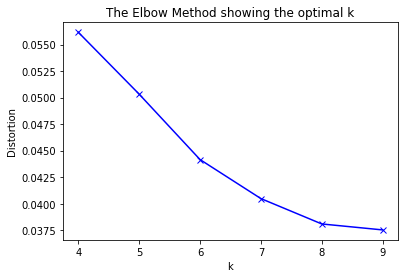

In [152]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
kmeans.set_params(n_clusters = 7, max_iter = 100, n_init = 15, random_state = 1)
kmeans.fit(normalized_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=7, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [17]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
# print(labels)
print(centers)

[[ 0.08453235  0.0214056   0.87682059  0.46485298  0.02643746  0.0044351 ]
 [ 0.01432326  0.00633745  0.99719931  0.06587921  0.00729347  0.00156399]
 [ 0.14918038  0.02752662  0.56514681  0.79974391  0.03116604  0.00585977]
 [ 0.04312631  0.0139169   0.97201384  0.2231627   0.01813195  0.00326563]
 [ 0.11324022  0.02534576  0.76793435  0.62056558  0.03105059  0.00511747]
 [ 0.06137999  0.01748898  0.93810319  0.33332625  0.02202778  0.00381534]
 [ 0.0256511   0.0088442   0.98992818  0.13474886  0.01022756  0.00177538]]


In [18]:
Final_train = X_train.assign(Cluster_Number = pd.Series(labels, name = 'Cluster_Number').values)

In [20]:
Final_train.groupby('Cluster_Number').ACCT_ID.nunique()

Cluster_Number
0    142185
1    404722
2     40302
3    372165
4     76756
5    231134
6    719218
Name: ACCT_ID, dtype: int64

# Test DataFrame

In [19]:
X_test[countiousVar+discreateVar] = X_test[countiousVar+discreateVar]\
                                    .apply(lambda x: x.clip_upper(np.percentile(x, 99))) \
                                    .apply(lambda x: x.clip_lower(np.percentile(x, 1)))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [21]:
Outliner_X_test = X_test[["ACCT_ID", "ACCT_TENURE"]]
Outliner_X_test["productVar_combined"] = X_test[productVar].sum(axis =1).apply(lambda x: x/len(productVar))
Outliner_X_test["amountVar_combined"] = X_test[amountVar].sum(axis =1).apply(lambda x: x/len(amountVar))
Outliner_X_test["frequentVar_combined"] = X_test[frequentVar].sum(axis =1).apply(lambda x: x/len(frequentVar))
Outliner_X_test["channelVar_combined"] = X_test[channelVar].sum(axis =1).apply(lambda x: x/len(channelVar))
Outliner_X_test["serviceVar_combined"] = X_test[serviceVar].sum(axis =1).apply(lambda x: x/len(serviceVar))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [22]:
normalized_X_test = scaler.fit_transform(Outliner_X_test.iloc[:, 1:])

In [23]:
Final_test = X_test.assign(Cluster_Number = pd.Series(kmeans.predict(normalized_X_test)).values)

In [24]:
Final = Final_train.append(Final_test)

In [25]:
Final.groupby('Cluster_Number').apply(lambda x: x.sum()/x.count())

,ACCT_ID,ACCT_TENURE,Service_Total,CCA_COUNT,Avg_Bill_AMT,Bill_Count,Total_Payment_Count,Avg_Payment,Equal_Payment_Plan_Flag,PP_COUNT,AutoPayFlag,Web_Enrollment_Flag,Mobile_Login_Counts,CSO_VISIT,IVR_COUNT,ACD_CALL_COUNT,Cluster_Number
Cluster_Number,,,,,,,,,,,,,,,,,
0,5.493625e+09,3.542008,1.634445,0.147534,37.111535,20.688406,18.890489,38.243833,0.037910,0.099399,0.097270,0.497870,1.821500,1.170280,1.121429,0.407852,0.0
1,5.500630e+09,3.221784,2.288206,0.199518,250.120597,17.472583,15.594182,290.865681,0.053695,0.654984,0.073306,0.607604,2.368193,0.788885,2.568584,1.117438,1.0
2,5.493641e+09,3.610802,1.252756,0.083767,13.927991,21.102780,17.906814,13.869991,0.023891,0.013600,0.123274,0.400655,1.383384,1.223216,0.648633,0.229313,2.0
3,5.497525e+09,3.540215,2.067925,0.189421,82.621639,20.397718,18.467284,89.111558,0.043652,0.416701,0.094730,0.543419,2.181940,1.121819,2.143575,0.779887,3.0
4,5.495070e+09,3.554078,1.471025,0.121188,24.545170,20.826616,18.645726,24.779728,0.030659,0.044366,0.102465,0.458374,1.560539,1.315752,0.922494,0.326449,4.0
5,5.495950e+09,3.518210,1.823354,0.167183,54.460266,20.571000,18.715492,57.300857,0.041997,0.209837,0.096370,0.520014,1.988759,1.133159,1.501559,0.547825,5.0
6,4.107446e+09,3.513806,2.183414,0.143024,135.293077,19.920694,18.264104,150.182478,0.053137,0.425491,0.064155,0.413514,1.645812,0.914424,2.368904,0.687955,6.0


In [26]:
Final.groupby('Cluster_Number').ACCT_ID.nunique()

Cluster_Number
0     284701
1     809261
2      80366
3     744808
4     153497
5     462416
6    1437916
Name: ACCT_ID, dtype: int64

In [28]:
Final[["ACCT_ID", "Cluster_Number"]].to_csv("Final_Cluster_Assignment.csv")

In [29]:
Final[["ACCT_ID", "Cluster_Number"]].head(10)

,ACCT_ID,Cluster_Number
1737995,5.373262e+09,3
2175549,6.484961e+09,3
476289,8.172788e+09,2
1399690,7.076234e+09,3
2986302,2.622453e+09,5
3112778,2.880848e+09,1
3189230,3.034150e+09,6
1100255,9.578912e+09,1
1849238,5.709799e+09,6
479823,8.170271e+09,6
